In [1]:
from model import *
from data import *

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


D:\TempSystem\ipykernel_14012\3357538038.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])


Epoch 1/5
   5/2000 [..............................] - ETA: 1:55:02 - loss: 608.9889 - accuracy: 0.7827

KeyboardInterrupt: 

### Train with npy file

In [5]:
imgs_train,imgs_mask_train = geneTrainNpy("unet/data/membrane/train/aug/","unet/data/membrane/train/aug/")
model_checkpoint = ModelCheckpoint('model.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

TypeError: Model.fit() got an unexpected keyword argument 'nb_epoch'

### test your model and save predicted results

In [2]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

D:\TempSystem\ipykernel_11820\1405464076.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(testGene,30,verbose=1)


30/30 [==============================] - 10s 321ms/step


d:\unet6\unet\data.py:125: UserWarning: data/membrane/test\0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
d:\unet6\unet\data.py:125: UserWarning: data/membrane/test\1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
d:\unet6\unet\data.py:125: UserWarning: data/membrane/test\2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
d:\unet6\unet\data.py:125: UserWarning: data/membrane/test\3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
d:\unet6\unet\data.py:125: UserWarning: data/membrane/test\4_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
d:\unet6\unet\data.py:125: UserWarning: data/membrane/test\5_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
d:\unet6\unet\data.py:125: UserWarning: data/membrane/test

In [ ]:
# Visualize top 5 ảnh đầu tiên
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

import glob2

img_5_paths = sorted(glob2.glob('unet/data/membrane/test'))[:5]


# Khởi tạo subplot với 1 dòng 5 cột.
fg, ax = plt.subplots(2, 5, figsize=(20, 8))
fg.suptitle('Image of Plot')

for i, path in enumerate(img_5_paths):
  image = plt.imread(path)
  ax[0, i].imshow(image)
  ax[0, i].set_xlabel('Image ' + path.split('/')[-1])



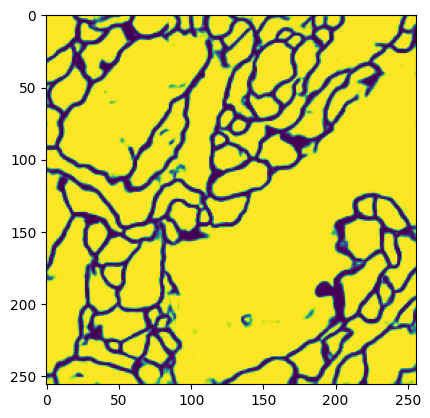

In [10]:
import matplotlib.pyplot as plt
X = results*255
plt.imshow(X[1])